- a simple two-layer convolutional neural network (CNN)
- with five inputs x1, . . . , x
- four hidden nodes z1, . . . , z4
- one output y with ReLU activations

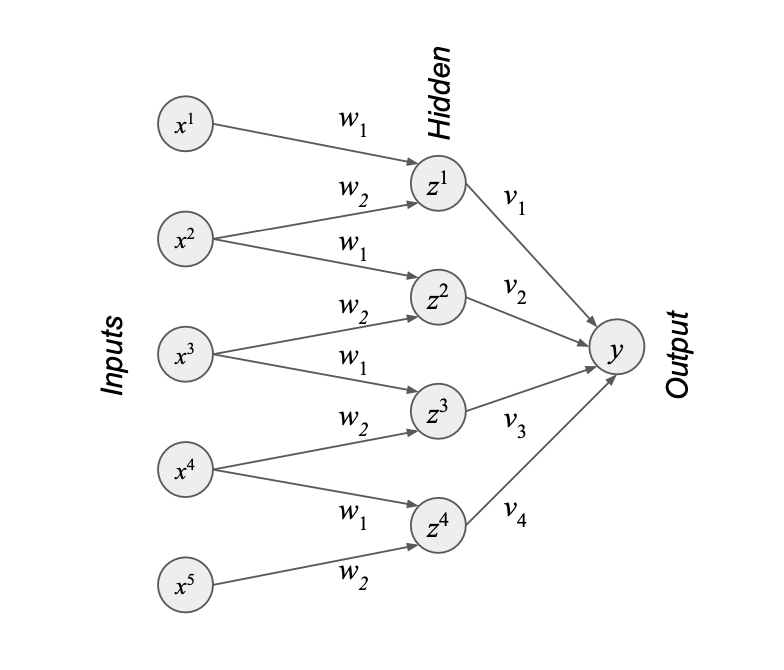

The hidden layer and output of the CNN is to be computed along with the gradient of the hidden layer and output with respect to parameter w1. The values of the parameters will be w1 =1.2, w2 =−0.2,v1 =−0.3, v2 =0.6, v3 =1.3 and v4 = −1.5

In [9]:
from ad import dual

In [11]:
x = dual(2, 4)
print(x)
print(repr(x))

(2,4)
(2,4)


In [28]:
def convnet(x):
    w = [1.2, -0.2]
    v = [-0.3, 0.6, 1.3, -1.5]

    z = []
    y = 0

    for i in range(len(x) - 1):
        z.append((x[i] * w[0], x[i+1] * w[1]))
    for i in range(len(z)):
        y += z[i][0] * v[i] + z[i][1] * v[i]
        
    return y, z

In [29]:
x = [1, 2, 3, 4, 5]
y, z = convnet(x)
print(f'y = {y}, z = {z}')

y = -1.2199999999999998, z = [(1.2, -0.4), (2.4, -0.6000000000000001), (3.5999999999999996, -0.8), (4.8, -1.0)]


In [46]:
z_test = [(1.4, -0.8), (2.1, -0.9), (3.2, -0.4), (9.8, -8.0)]

for i, j in zip(z, z_test):
    print(max(i, j))

(1.4, -0.8)
(2.4, -0.6000000000000001)
(3.5999999999999996, -0.8)
(9.8, -8.0)


In [ ]:
w1 =1.2
w2 = -0.2

v1 = -0.3
v2 = 0.6
v3 = 1.3
v4 = -1.5

In [2]:
# CNN - 3 layers
# Layer 1 - 5 input nodes x
# Layer 2 - 4 hidden nodes z
# Later 3 - 1 output nodes y
# ReLU activations

import tensorflow as tf

# Define the input shape
input_shape = (5,)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=input_shape, activation='relu'),  # Layer 1
    tf.keras.layers.Dense(4, activation='relu'),  # Layer 2
    tf.keras.layers.Dense(1, activation='sigmoid')  # Layer 3
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59 (236.00 B)

 Trainable params: 59 (236.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

# Define the input shape
input_shape = (5, 5, 3)  # Assuming input is a 5x5 RGB image

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),  # Layer 1
    tf.keras.layers.MaxPooling2D((2, 2)),  # Layer 2
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),  # Layer 3
    tf.keras.layers.MaxPooling2D((2, 2)),  # Layer 4
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Layer 5
    tf.keras.layers.Flatten(),  # Layer 6
    tf.keras.layers.Dense(64, activation='relu'),  # Layer 7
    tf.keras.layers.Dense(1, activation='sigmoid')  # Layer 8
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()